In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 subset="training",
                                                 class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/Validation',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

#color_mode = "grayscale"


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 2240 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
num_batches_to_print = 5  # Adjust as needed
for i, (batch_x, batch_y) in enumerate(training_set):
    print("Batch:", i)
    print("Input shape:", batch_x.shape)
    print("Target shape:", batch_y.shape)
    if i == num_batches_to_print - 1:
        break


Batch: 0
Input shape: (8, 224, 224, 3)
Target shape: (8, 2)
Batch: 1
Input shape: (8, 224, 224, 3)
Target shape: (8, 2)
Batch: 2
Input shape: (8, 224, 224, 3)
Target shape: (8, 2)
Batch: 3
Input shape: (8, 224, 224, 3)
Target shape: (8, 2)
Batch: 4
Input shape: (8, 224, 224, 3)
Target shape: (8, 2)


In [ ]:
# Replace these values with the actual dimensions of your input data
height = 224
width = 224
channels = 3  # For RGB images, set to 1 for grayscale

model.add(Conv2D(32, (3, 3), input_shape=(height, width, channels)))


In [ ]:
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the batch size
batch_size = 32  # You can adjust this value based on your requirements

# Specify the path to your training data
training_data_path = '/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/train'

# Create an ImageDataGenerator for training data
training_data_generator = ImageDataGenerator(
    # Add other data augmentation configurations as needed
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
)

# Flow from directory using the generator
training_set = training_data_generator.flow_from_directory(
    training_data_path,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2800 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import numpy as np

# Assuming you have a Sequential model
model = Sequential()

# Example model architecture for image classification (modify based on your needs)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have training and validation data directories
train_directory = '/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/train'
valid_directory = '/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/dataset-final/dataset/Validation'

# Assuming num_classes is the number of classes in your classification task
num_classes = 2

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size=(height, width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = test_datagen.flow_from_directory(valid_directory,
                                                 target_size=(height, width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

# Set up callbacks
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5',
                              verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]

# Training the model
start = datetime.now()
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=20,
                    verbose=5,
                    validation_data=validation_set,
                    validation_steps=len(validation_set),
                    callbacks=callbacks)
duration = datetime.now() - start
print("Training completed in time: ", duration)


Found 2800 images belonging to 2 classes.
Found 608 images belonging to 2 classes.
Epoch 1/20

Epoch 1: val_loss improved from inf to 0.60777, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20

Epoch 2: val_loss improved from 0.60777 to 0.54319, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5
Epoch 3/20

Epoch 3: val_loss improved from 0.54319 to 0.45643, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5
Epoch 4/20

Epoch 4: val_loss improved from 0.45643 to 0.36869, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5
Epoch 5/20

Epoch 5: val_loss improved from 0.36869 to 0.23964, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5
Epoch 6/20

Epoch 6: val_loss improved from 0.23964 to 0.21740, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model.h5
Epoch 7/20

Epoch 7: val_loss did not improve from 0.21740
Epoch 8/20

Epoch 8: val_loss improved from 0.21740 to 0.15711, saving model to /content/drive/MyDrive/Colab Notebooks/final dataset use

In [ ]:
score = model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

75/75 [==============================] - 356s 5s/step - loss: 0.0622 - accuracy: 0.9817
Test Loss: 0.06219245120882988
Test accuracy: 0.9816666841506958


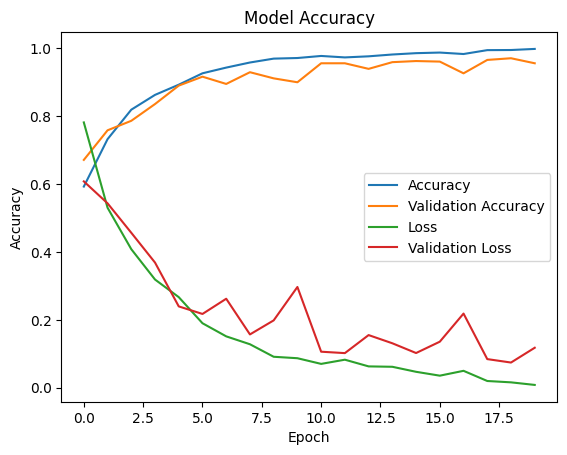

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])
plt.show()


In [ ]:
pip install seaborn

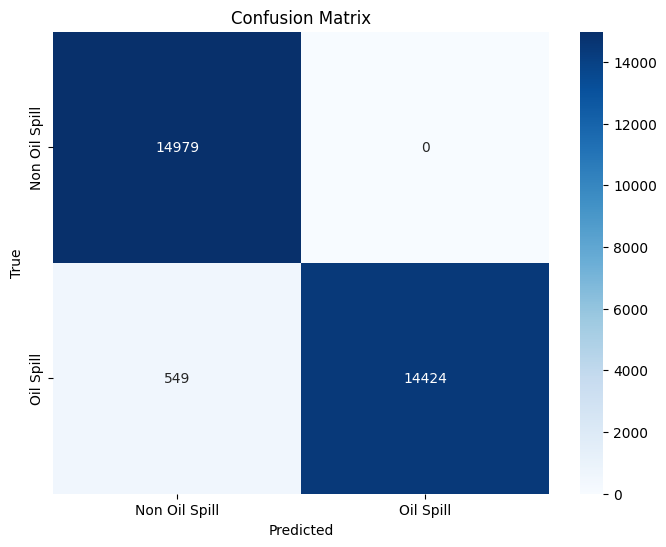

In [ ]:
class_names = ["Non Oil Spill", "Oil Spill"]  # Replace with your actual class labels

# Assuming you have true_labels and predicted_labels from the previous code
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import precision_score

# Assuming you have true_labels and predicted_labels from the previous code
precision_oil_spill = precision_score(true_labels, predicted_labels, pos_label=1)
precision_non_oil_spill = precision_score(true_labels, predicted_labels, pos_label=0)

print(f'Precision for "Oil Spill": {precision_oil_spill}')
print(f'Precision for "Non Oil Spill": {precision_non_oil_spill}')


Precision for "Oil Spill": 1.0
Precision for "Non Oil Spill": 0.964644513137558


In [ ]:
# Simpan model dalam format SavedModel
model.save("testmodel", save_format="tf")

# Muat kembali model (opsional)
# loaded_model = load_model("testmodel")
